In [30]:
from pylab import*
%matplotlib inline 

In [40]:
def raiz_bin(func,x_i,x_d,err= 1e-19):#err es el "tope" de nuestra busqueda de la raíz con un margen de error de 1e-5,esto tiene repercucuines com el intervalo que te de como error cresca o disminuye
    raiz= 0.5*(x_i+x_d)
    y_i,y_d = func(x_i), func(x_d)
    #n=0
    while abs(y_d )  >=err: #error en el eje x
        y_m = func(raiz) #debemos saber cuanto vale la función en cada uno de los lados" por la derecha y la izquierda"
        if y_m==0:
            #print "le atine!!"
            break
        
        elif y_m*y_i < 0 :
            x_d = raiz
        else:
            x_i=raiz
            
        raiz= 0.5*(x_i+x_d)
        y_i,y_d = func(x_i), func(x_d)
        #n+=1
        #print "paso: ",n, " raiz=",raiz 
    return raiz


In [46]:
def newton_1(ec,d_ec, x_i, error=1e-12):

    while abs(ec(x_i)) >= error:
        raiz= x_i - ec(x_i)/ d_ec(x_i)
        x_i=raiz
        
        if x_i==0:
            #print "le atine!!"
            break
    
    return raiz

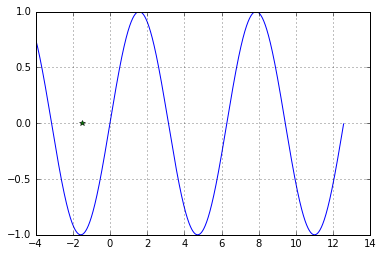

In [33]:
t= [-4,4*pi]
tiempo=arange(t[0],t[1],0.01)
y= sin(tiempo)
plot (tiempo,y,"-")
plot (-1.5,0,"*")
grid(True)

show()

# $Problema 1$

In [175]:
def busca_r(ec,d_ec,t,dt):
    #t = [-4,4*pi]
    tiempo= arange(t[0],t[1],dt)
    raices=[]
    #posibles_raices=[]
    sol=zeros((len(tiempo),len(t)))
    for i in tiempo:
        s_l = ec(i)
        sol[i,:] = array([i,s_l])
        if sol[i,:][1] == 0:
            raices.append(sol[i,:][0])

        #if (sol[i+1,:][1])*(sol[i,:][1]) < 0:
            #posibles_raices.append(sol[i,:])
            #posibles_raices.append(sol[i+1,:])
    #for j in (len(posibles_raices)-1):
        elif sol[i,:][1] <0:
            #ra=raiz_bin(sin,sol[i,:][0],sol[i+1,:][0])
            ra=newton_1(ec,d_ec,sol[i,:][0])
            raices.append(ra)
            #print ra
    #for j in raices:
       # if j > t[1]:
            #raices = raices
        #elif j== j+1:

    #print "posibles raices",posibles_raices   
    #print "posibles raices sin repetir",posibles_raices
    #print "raices",raices
    #print sol[1,:]
    #print sol[2,:]
    #print sol[2,:][1]* sol[1,:][1]
    return raices

In [34]:
def busca_r_1(ec,t,dt):
    tiempo= arange(t[0],t[1],dt)
    raices=[]
    raices2=[]
    error=1e-3
    for i in tiempo:
        s_l1= ec(i)
        s_l2 = ec(i+1)
        
        if s_l1 == 0:
            raices.append(i)
        elif s_l2 == 0:
            raices.append(i+1)
            
        elif s_l1 * s_l2 <0:
            #ra= newton_1(ec,d_ec,i+1)
            ra= raiz_bin(ec,i,i+1)
            raices.append(ra)
    for j in raices:
            
        if j not in raices2 :
            raices2.append(j)
            
        #elif abs(j - j+1) < error:
            #raices2.remove(j+1)

    return raices2

In [44]:
def busca_r_2(ec,d_ec,t,dt):
    tiempo= arange(t[0],t[1],dt)
    raices=[]
    raices2=[]
    for i in tiempo:
        s_l1= ec(i)
        s_l2 = ec(i+1)
        
        if s_l1 == 0:
            raices.append(i)
        elif s_l2 == 0:
            raices.append(i+1)
            
        elif s_l1 * s_l2 <0:
            ra= newton_1(ec,d_ec,i+1)
            raices.append(ra)
            
    for j in raices:
        if j not in raices2 :
            raices2.append(j)
    return raices2

In [61]:
def ec (x):
    y=cos(x) + (6/5)*(sin(x*x))
    return y

In [64]:
def d_ec(x):
    y_p=-sin(x) + (12/5)*(cos(x*x))
    return y_p

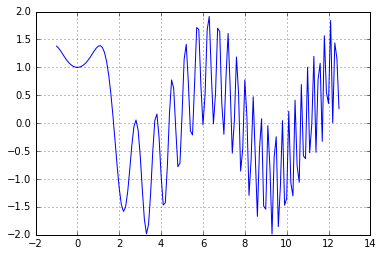

In [59]:
t=arange(-1,4*pi,.1)
y=ec(t)
plot(t,y)
grid(True)
show()

In [70]:
t=[0,2*pi]
r=busca_r_1(ec,t,0.1)
print r

[1.7276420222595334, 1.7276419937610625, 1.7276420230045915, 1.727642022445798, 1.727642020955682, 1.7276420222595332, 1.727641993761063, 2.7276420213282107, 3.6867361504584553, 4.3797484469600025, 4.3797484459355474, 4.3797484435141083, 3.8534421537071468, 3.853442155010999, 4.3797484435141092, 4.9859028619714083, 4.9859028609469531, 4.6867361502721909, 5.3797484459355474, 4.985902860946954, 5.5314439000561837]


In [47]:
t=[-1,4*pi]
r=busca_r_2(sin,cos,t,.01)
print r

[0.0, 1.2334917294390749e-20, 6.3239479842006063e-18, 2.4326278025375153e-16, 3.2425674829656553e-15, 2.4185142007571853e-14, 1.2495504576794797e-13, 5.011336533461766e-13, -3.3087224502121107e-24, -1.9852334701272664e-23, -4.632211430296955e-23, -1.3234889800848443e-22, -3.5734202462290796e-22, -9.7938184526278477e-22, -2.5940384009662948e-21, -6.6174449004242214e-21, -1.6464202912255463e-20, -3.9810548520952116e-20, -9.3703019790006975e-20, -2.150404894841855e-19, -4.8302053817176477e-19, -1.0615440411464519e-18, -2.2869889575866109e-18, -4.8361346123484278e-18, -1.0044963721488748e-17, -2.0513443916604646e-17, -4.1229328707603069e-17, -8.1617553698582618e-17, -1.5926082880864806e-16, -3.0654461174312031e-16, -5.8240799607079535e-16, -1.0929012008538061e-15, -2.0267906005854569e-15, -3.7166619879392543e-15, -6.7427380139820775e-15, -1.2107983615294166e-14, -2.1530784696365685e-14, -3.793061649276161e-14, -6.6227927276400061e-14, -1.1465255014917602e-13, -1.9686985060825973e-13, -3.35

# $Problema2$

In [ ]:
def ec2(t)

In [37]:
j=linspace(-4,4,30)
x=linspace(-4,4,100)
#for i in x:
i=-4
#for j in tiempo:

#ec= 2*(e**-(i+1)**2)*((e**-(j+2)**2)+(e**-(j-2)**2)) + ((6*i)*(i*i + j*j)*(e**-(i*i + j*j))) - 1

plot(ec[:,0],ec[:,1])
        

IndexError: too many indices for array

# $Problema 3$